In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

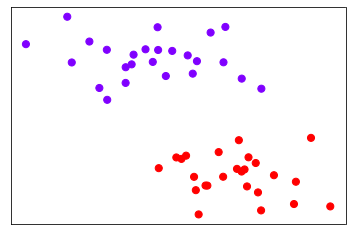

In [2]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")#rainbow彩虹色
plt.xticks([])
plt.yticks([])
plt.show()

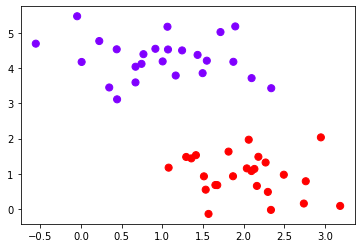

In [7]:
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图


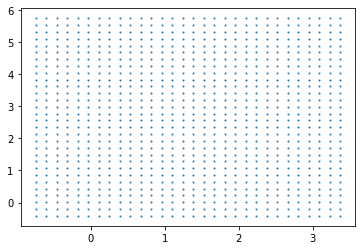

In [8]:
#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
 
axisy,axisx = np.meshgrid(axisy,axisx)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标
 
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
 
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")
 
#理解函数meshgrid和vstack的作用
a = np.array([1,2,3])
b = np.array([7,8])
#两两组合，会得到多少个坐标？
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)
 
v1,v2 = np.meshgrid(a,b)
 
v1
 
v2
 
v = np.vstack([v1.ravel(), v2.ravel()]).T


(-0.41872382476349596, 5.754870487889891)

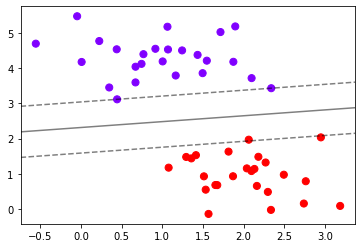

In [9]:
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)#计算出对应的决策边界
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5#透明度
           ,linestyles=["--","-","--"])
 
ax.set_xlim(xlim)#设置x轴取值
ax.set_ylim(ylim)




In [22]:
#将上述过程包装成函数：
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
 


In [12]:
clf.predict(X)
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples
 
clf.score(X,y)
#返回给定测试数据和标签的平均准确度
 
clf.support_vectors_
#返回支持向量坐标
 
clf.n_support_#array([2, 1])
#返回每个类中支持向量的个数

array([2, 1])

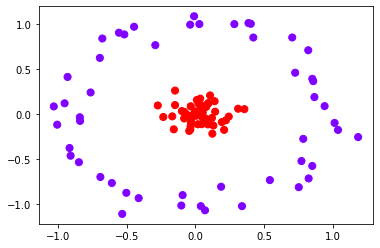

In [25]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
 
X.shape
 
y.shape
 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()


0.67

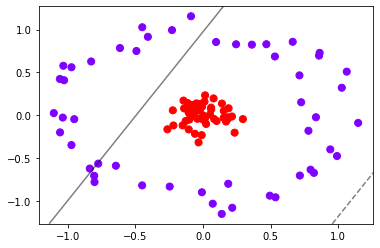

In [16]:
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)
clf.score(X,y)

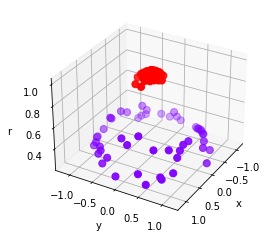

In [17]:
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))
 
rlim = np.linspace(min(r),max(r),100)
 
from mpl_toolkits import mplot3d
 
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
    
plot_3D()

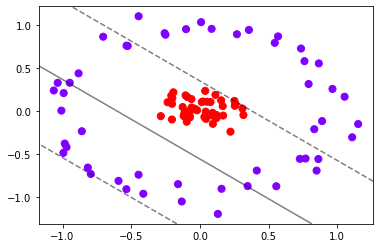

In [21]:
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

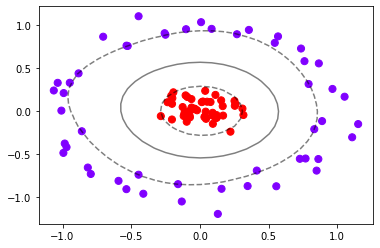

In [19]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)
